# Part 1: Loading and Preparing the Data

In [1]:
#Importing Libraries
% matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#Unzipping Data Files
from zipfile import ZipFile

with ZipFile('ml-100k.zip', 'r') as ratings:
    ratings.extractall()

In [4]:
ratings=pd.read_csv( './ml-100k/u.data', 
                    sep="\t", 
                    names=["user_id","item_id","rating","timestamp"]) #\t because TAB separated
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#Loading User Data
users=pd.read_csv('./ml-100k/u.user', 
                  sep="|", 
                  names=["user_id", "age", "gender","occupation","zip_code"], index_col="user_id")
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [6]:

#Loading our movie dataset
films=pd.read_csv('./ml-100k/u.item', 
                  sep="|", 
                  names=["movie id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action","Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"], index_col="movie id", encoding="latin1")
  
unknown=films['unknown'].values
action=films['Action'].values
adventure=films['Adventure'].values
animation	=films['Animation'].values
childrens=films["Children's"].values
comedy=films['Comedy'].values
crime	=films['Crime'].values
documentary=films['Documentary'].values
drama=films['Drama'].values
fantasy	=films['Fantasy'].values
filmnoir=films['Film-Noir'].values
horror=films['Horror'].values
musical=films['Musical'].values
mystery=films['Mystery'].values
romance=films['Romance'].values
scifi=films['Sci-Fi'].values
thriller=films['Thriller'].values
war	=films['War'].values
western=films['Western'].values 

genres=[unknown, action, adventure, animation, childrens, comedy, crime, documentary, drama, fantasy, filmnoir, horror, musical , mystery, romance, scifi, thriller, war, western]
films.head()

,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Part 2: Combining the Datasets

In [7]:
#Extracting User, Movie, rating, age, and gender data
userID=ratings['user_id'].values
movieID=ratings['item_id'].values
rating=ratings['rating'].values
age=users['age'].values
gender=users['gender'].values

In [8]:
#Becuase the User, Movie, and Rating datasets are all organizing differently, we need to correspond the datapoints
# Reorganizing age and gender data (from users) to match up with User ID (from ratings)
age2=[]
gender2=[]

for x in userID:
    y=age[x-1]
    z=gender[x-1]
    age2.append(y)
    gender2.append(z)

#print(age2)
#print(gender2)

In [9]:
# Reorganizing each genre (from films) to match up with Movie ID (from ratings)
unknown2=[]
action2=[]
adventure2=[]
animation2=[]
childrens2=[]
comedy2=[]
crime2=[]
documentary2=[]
drama2=[]
fantasy2=[]
filmnoir2=[]
horror2=[]
musical2=[]
mystery2=[]
romance2=[]
scifi2=[]
thriller2=[]
war2=[]
western2=[]

for x in userID:
    a=unknown[x-1]
    unknown2.append(a)
    b=action[x-1]
    action2.append(b)
    c=adventure[x-1]
    adventure2.append(c)
    d=animation[x-1]
    animation2.append(d)
    e=childrens[x-1]
    childrens2.append(e)
    f=comedy[x-1]
    comedy2.append(f)
    g=crime[x-1]
    crime2.append(g)
    h=documentary[x-1]
    documentary2.append(h)
    i=drama[x-1]
    drama2.append(i)
    j=fantasy[x-1]
    fantasy2.append(j)
    k=filmnoir[x-1]
    filmnoir2.append(k)
    l=horror[x-1]
    horror2.append(l)
    m=musical[x-1]
    musical2.append(m)
    n=mystery[x-1]
    mystery2.append(n)
    o=romance[x-1]
    romance2.append(o)
    p=scifi[x-1]
    scifi2.append(p)
    q=thriller[x-1]
    thriller2.append(q)
    r=war[x-1]
    war2.append(r)
    s=western[x-1]
    western2.append(s)

In [10]:
# Create a new data table of organized and corresponded info
df = pd.DataFrame()

df['userID']=userID
df['movieID']=movieID
df['ages']=age2
df['gender']=gender2
df['ratings']=rating
df['Unknown']=unknown2
df['Action']=action2
df['Adventure']=adventure2
df['Animation']=animation2
df['Childrens']=childrens2
df['Comedy']=comedy2
df['Crime']=crime2
df['Documentary']=documentary2
df['Drama']=drama2
df['Fantasy']=fantasy2
df['FilmNoir']=filmnoir2
df['Horror']=horror2
df['Musical']=musical2
df['Mystery']=mystery2
df['Romance']=romance2
df['Scifi']=scifi2
df['Thriller']=thriller2
df['War']=war2
df['Western']=western2


# Making Gender binary
df.gender = df.gender.map({'M':0, 'F':1})

# Giving ratings below 3 value of 0 and ratings that are 3 and above value of 1
from sklearn.preprocessing import OneHotEncoder

df.ratings=df.ratings.map({1:0, 2:0, 3:1, 4:1, 5:1})

df.head()

,userID,movieID,ages,gender,ratings,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,Scifi,Thriller,War,Western
0,196,242,49,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,39,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,22,377,25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,244,51,28,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,166,346,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Part 3: Setting up the Neural Network/Training the Model

In [11]:
#Setting up our Inputs (age, gender, genre) and Outputs(Like/Not Like)
movieID2=movieID.tolist()

Xf=['ages', 'gender','Unknown', 'Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery','Romance','Scifi','Thriller','War','Western']
X=np.array(df[Xf])
y=df['ratings'].values

In [12]:
#Splitting data into Train and Test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.1)

#Normalizing
scaler = StandardScaler()
scaler.fit(Xtr)
Xtr_sc = scaler.transform(Xtr)
Xts_sc = scaler.transform(Xts)

In [13]:
#Clearing Session if we want to rerun the model so not to train already trained model
import tensorflow.keras.backend as K

K.clear_session()

In [14]:
# Building the model
# Using Binary Classification Sigmoid Output Function
# Output shape of (1,1)--meaning the output is one number (between 0 and 1)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(21, input_shape=(21,), activation='relu', name='hidden1'))
model.add(Dense(15, input_shape=(21,), activation='relu', name='hidden2'))
model.add(Dense(1, input_shape=(15,), activation='sigmoid', name='output'))

In [15]:
#Summarizing model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 21)                462       
_________________________________________________________________
hidden2 (Dense)              (None, 15)                330       
_________________________________________________________________
output (Dense)               (None, 1)                 16        
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Setting up the optimizer, learning rate, and compiling the model
# using learning rate of 0.001
# using loss function of binary crossentropy
# Using accuracy metric of test accuracy
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the neural network on a batch size of 150 and 30 epochs
history = model.fit(Xtr,
                    ytr, 
                    batch_size = 150, 
                    epochs = 30, 
                    shuffle = True,
                    validation_data=(Xts,yts))

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4686 - accuracy: 0.8240 - val_loss: 0.4654 - val_accuracy: 0.8233
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.8254 - val_loss: 0.4648 - val_accuracy: 0.8233
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8254 - val_loss: 0.4609 - val_accuracy: 0.8233
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.8254 - val_loss: 0.4603 - val_accuracy: 0.8233
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.8254 - val_loss: 0.4601 - val_accuracy: 0.8233
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.8254 - val_loss: 0.4592 - val_accuracy: 0.8233
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.8254 - val_loss: 0.4617 - val_accuracy: 0.8233
Epoch 

# Part 4: Visualizing the Results

Text(0, 0.5, 'Test accuracy')

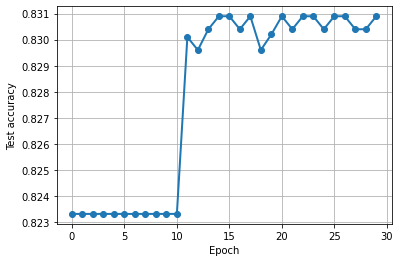

In [19]:
#Visualizing Test Accuracy Improvement
val_accuracy = history.history['val_accuracy']

plt.plot(val_accuracy, 'o-', linewidth=2)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')

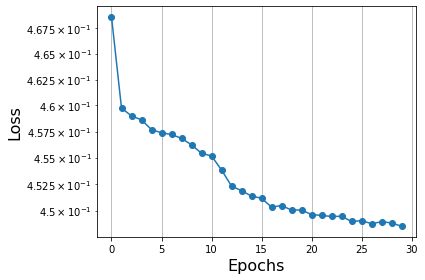

In [20]:
#Visualing loss function decrease
loss = history.history['loss']
plt.semilogy(loss, 'o-')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.grid()
plt.tight_layout()

# Part 5: Demonstration

In [21]:
# DEMO!!!

titles2=films["movie_title"].values
print("Want to check if a movie is in our list? Type name of movie and the year it came out. If first word in title is A or The, include after the rest of the name.")
print("E.g. White Balloon, The (1995)")
print("")
p=input("Input a movie title: ")
print("")

titles=list(titles2)

if p in titles :
    print("Yes,", p, "is in our list")
    print("The index of ", p, "is:", titles.index(p)+1)
else:
    print(p, "is not in our list OR you didn't input the title correctly.")

Want to check if a movie is in our list? Type name of movie and the year it came out. If first word in title is A or The, include after the rest of the name.
E.g. White Balloon, The (1995)

Input a movie title: White Balloon, The (1995)

Yes, White Balloon, The (1995) is in our list
The index of  White Balloon, The (1995) is: 18


In [ ]:
#Testing out our algorithm
#Asking for Inputs/Info

input1=int(input("What is your age? "))
input2=int(input("What is your gender? (0 for Male, 1 for Female) "))
input3=int(input("What movie number do you want to predict? "))

loop = 0
moviegenres=[]
genrevalues=[]

for x in genres:
    loop = 0
    a=x[input3-1]
    genrevalues.append(a)

class_names=['1', '2', '3', '4', '5']
  
Xevaluation=[input1, input2]
for i in genrevalues:
    Xevaluation.append(i)
#print(Xevaluation)
Xevaluation2=np.asarray(Xevaluation)
X3=Xevaluation2.reshape((1,21))
X3.shape
#print(class_names)
c=model.predict(X3)
print()
print()
print(c)